# GRIP@ The Spark Foundation

# Task 4: Exploratory Data Analysis- Terrorism on Global Terrorism Dataset

# By: Arpita Bajaj 

In [1]:
#Import all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Extracting Dataset

In [4]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='cp1252')

In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
#Changing the inconvenient column names

In [7]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

df.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [8]:
#Check for the missing values in dataset¶

In [9]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [10]:
#Fetching some required data like highest attacks on country

In [11]:
print(f"The highest terrorist attacks were commited in {df.Country.value_counts().index[0]} with {df.Country.value_counts().max()} attacks")
print('Top 4 countries with highest terrorist attacks following iraq are:')
for i in range(1,5):
    print(f"{i+1}. {df.Country.value_counts().index[i]} with {df.Country.value_counts()[i]} attacks")

The highest terrorist attacks were commited in Iraq with 24636 attacks
Top 4 countries with highest terrorist attacks following iraq are:
2. Pakistan with 14368 attacks
3. Afghanistan with 12731 attacks
4. India with 11960 attacks
5. Colombia with 8306 attacks


In [12]:
#Fetching no. of attacks each year

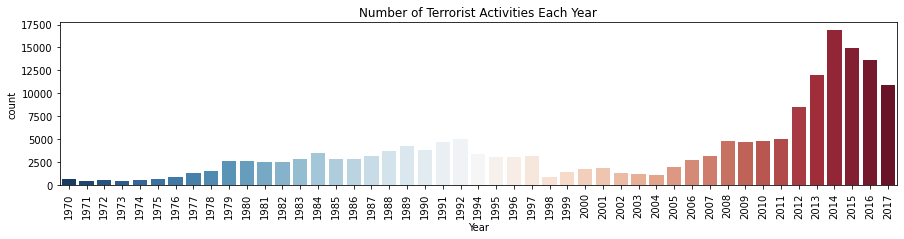

In [13]:
plt.subplots(figsize=(15,3))
sns.countplot('Year',data=df,palette='RdBu_r')
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')
plt.show()

In [14]:
#Fetching no. of total attacks in each country

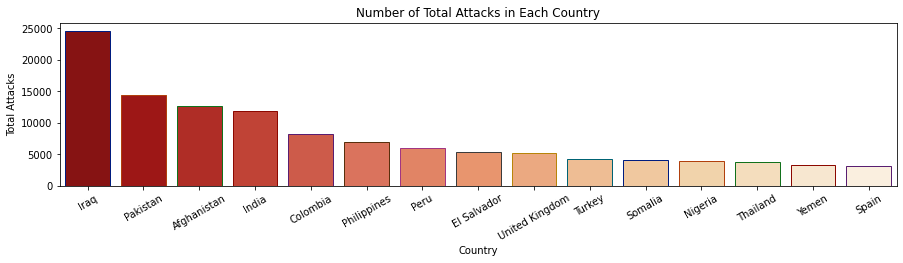

In [15]:
plt.subplots(figsize=(15,3))
country_attacks=df.Country.value_counts()[:15].reset_index()
country_attacks.columns=['Country','Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'],palette='OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Attacks in Each Country')
plt.show()

In [16]:
#Fetching data of no. of total attacks in each region

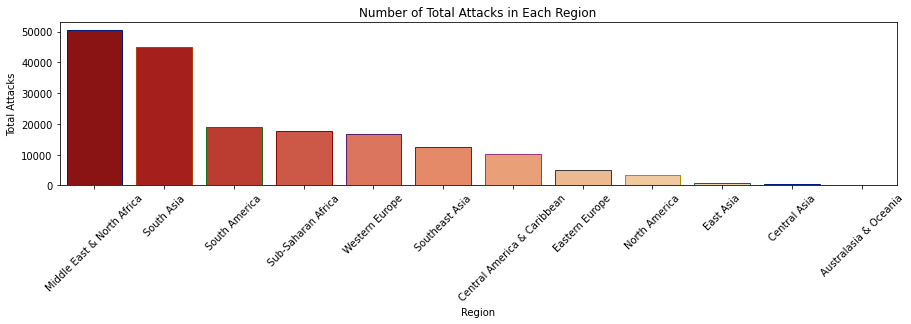

In [17]:
region_attacks=df.Region.value_counts().to_frame().reset_index()
region_attacks.columns=['Region','Total Attacks']
plt.subplots(figsize=(15,3))
sns.barplot(x=region_attacks.Region,y=region_attacks['Total Attacks'],palette='OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=45)
plt.title('Number of Total Attacks in Each Region')
plt.show()

In [18]:
#Printing table of terrorist group and their total attacks

In [19]:
group_attacks=df.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns=['Terrorist Group','Total Attacks']
group_attacks                                                                             

,Terrorist Group,Total Attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


In [20]:
#Fetching no. of total attacks by different terrorist group

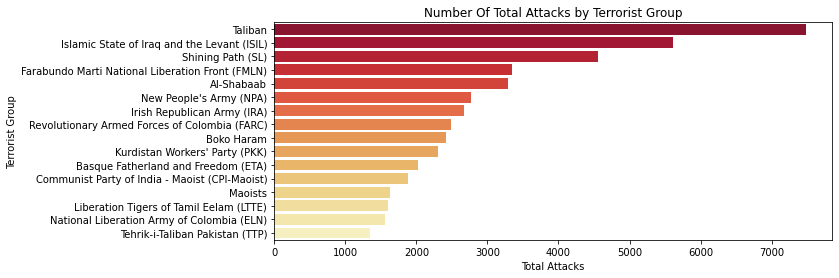

In [21]:
group_attacks = df.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,4))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='YlOrRd_r',
            )

plt.title('Number Of Total Attacks by Terrorist Group')
plt.show()

In [22]:
#Visual Representaion of top terrorist groups activities from 1970-2017

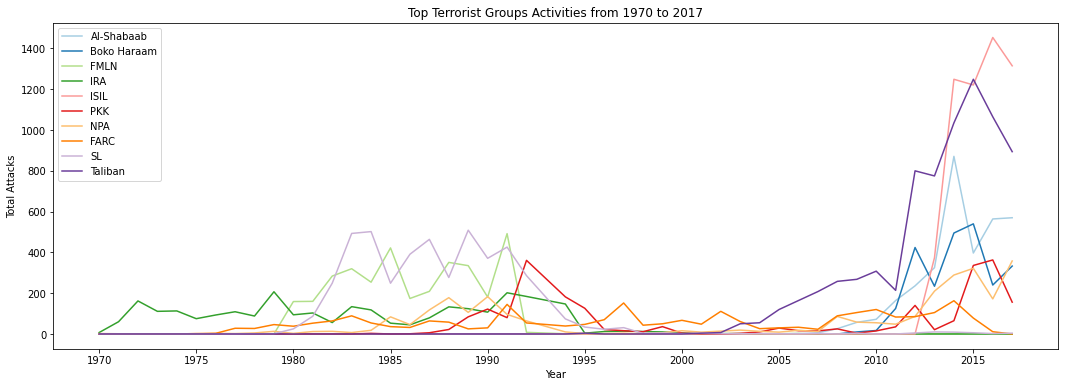

In [23]:
groups_10 = df[df.Group.isin(df.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities from 1970 to 2017')
plt.legend(labels=['Al-Shabaab',
                   'Boko Haraam',
                   'FMLN',
                   'IRA',
                   'ISIL',
                   'PKK',
                   'NPA',
                   'FARC',
                   'SL',
                   'Taliban'], loc='upper left')
plt.show()
